
In this notebook, You will do amazon review classification with BERT.[Download data from [this](https://www.kaggle.com/snap/amazon-fine-food-reviews/data) link]
<pre> 
It contains 5 parts as below.  Detailed instrctions are given in the each cell. please read every comment we have written. 
    1. Preprocessing 
    2. Creating a BERT model from the Tensorflow HUB.
    3. Tokenization
    4. getting the pretrained embedding Vector for a given review from the BERT.
    5. Using the embedding data apply NN and classify the reviews.
    6. Creating a Data pipeline for BERT Model. 

<font size=5>instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. 
    If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. please return outputs in the same format what we asked. Eg. Don't return List if we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>
</pre>

In [ ]:
#in this assignment you need two files reviews.csv and tokenization file
#you can use gdown module to import both the files in colab from Google drive
#the syntax is for gdown is !gdown --id file_id
#please run the below cell to import the required files


In [1]:
# !gdown --id 1GsD8JlAc_0yJ-1151LNr6rLw83RRUPgt
# !gdown --id 13exfXiyiByluh1PfYK1EyZyizqxeCVG9

Downloading...
From: https://drive.google.com/uc?id=1GsD8JlAc_0yJ-1151LNr6rLw83RRUPgt
To: /content/Reviews.csv
100% 301M/301M [00:02<00:00, 116MB/s]
Downloading...
From: https://drive.google.com/uc?id=13exfXiyiByluh1PfYK1EyZyizqxeCVG9
To: /content/tokenization.py
100% 17.3k/17.3k [00:00<00:00, 29.5MB/s]


In [1]:
#all imports
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Model

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1633217370487283731,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3665166336
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6977592661218643489
 physical_device_desc: "device: 0, name: GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"]

<font size=4>Grader function 1 </font>

In [3]:
def grader_tf_version():
    assert((tf.__version__)>'2')
    return True
grader_tf_version()

True

<pre><font size=6>Part-1: Preprocessing</font></pre>

In [260]:
#Read the dataset - Amazon fine food reviews
reviews = pd.read_csv(r"Reviews.csv")
#check the info of the dataset
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [261]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [262]:
#get only 2 columns - Text, Score
#drop the NAN values

reviews = reviews[['Text','Score']]
reviews.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [263]:
reviews.isna().any()

Text     False
Score    False
dtype: bool

In [264]:
#if score> 3, set score = 1
#if score<=2, set score = 0
#if score == 3, remove the rows. 

reviews.drop(reviews[reviews['Score'] == 3].index, inplace = True)
reviews['Score'] = np.where(reviews['Score']>3, 1, 0)
reviews.head()

,Text,Score
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [265]:
reviews.Score.value_counts()

1    443777
0     82037
Name: Score, dtype: int64

<font size=4>Grader function 2 </font>

In [266]:
def grader_reviews():
    temp_shape = (reviews.shape == (525814, 2)) and (reviews.Score.value_counts()[1]==443777)
    assert(temp_shape == True)
    return True
grader_reviews()

True

In [267]:
def get_wordlen(x):
    return len(x.split())
reviews['len'] = reviews.Text.apply(get_wordlen)
reviews = reviews[reviews.len<50]
reviews = reviews.sample(n=100000, random_state=30)

In [268]:
reviews.reset_index(drop=True, inplace=True)
reviews.head()

,Text,Score,len
0,The tea was of great quality and it tasted lik...,1,30
1,My cat loves this. The pellets are nice and s...,1,31
2,Great product. Does not completely get rid of ...,1,41
3,This gum is my favorite! I would advise every...,1,27
4,I also found out about this product because of...,1,22


In [270]:
#remove HTML from the Text column and save in the Text column only

import re
for i in range(len(reviews)):
    row = reviews.Text[i]
    html = re.compile(r'<.*?>')
    row = re.sub(html,' ',row)
    reviews.Text[i] = row
    

<ipython-input-270-6d145bf372d7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews.Text[i] = row


In [ ]:
#print head 5

In [272]:
reviews.head()

,Text,Score,len
0,The tea was of great quality and it tasted lik...,1,30
1,My cat loves this. The pellets are nice and s...,1,31
2,Great product. Does not completely get rid of ...,1,41
3,This gum is my favorite! I would advise every...,1,27
4,I also found out about this product because of...,1,22


In [ ]:
#split the data into train and test data(20%) with Stratify sampling, random state 33, 

In [273]:
reviews.len

0        30
1        31
2        41
3        27
4        22
         ..
99995    39
99996    28
99997    21
99998    23
99999    28
Name: len, Length: 100000, dtype: int64

In [387]:
#saving to disk. if we need, we can load preprocessed data directly. 
reviews.to_csv('preprocessed.csv', index=False)

In [4]:
reviews = pd.read_csv('preprocessed.csv')
reviews.head()

,Text,Score,len
0,The tea was of great quality and it tasted lik...,1,30
1,My cat loves this. The pellets are nice and s...,1,31
2,Great product. Does not completely get rid of ...,1,41
3,This gum is my favorite! I would advise every...,1,27
4,I also found out about this product because of...,1,22


In [5]:
Y = reviews['Score']
X = reviews.drop(['Score','len'],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 33)

In [7]:
X_train.shape

(80000, 1)

In [ ]:
#plot bar graphs of y_train and y_test

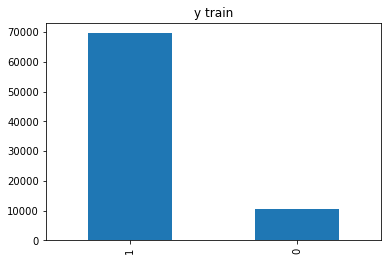

In [16]:
import matplotlib.pyplot as plt
y_train.value_counts().plot(kind='bar')
plt.title('y train')
plt.show()

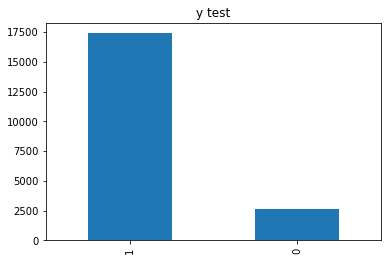

In [17]:
y_test.value_counts().plot(kind='bar')
plt.title('y test')
plt.show()

<pre><font size=6>Part-2: Creating BERT Model</font> 

If you want to know more about BERT, You can watch live sessions on Transformers and BERt. 
we will strongly recommend you to read <a href="https://jalammar.github.io/illustrated-transformer/">Transformers</a>, <a href="https://arxiv.org/abs/1810.04805">BERT Paper</a> and, <a href="https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/">This blog</a>.


For this assignment, we are using <a href="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1">BERT uncased Base model</a>. 
It uses L=12 hidden layers (i.e., Transformer blocks), a hidden size of H=768, and A=12 attention heads. </pre>

In [18]:
## Loading the Pretrained Model from tensorflow HUB
tf.keras.backend.clear_session()

# maximum length of a seq in the data we have, for now i am making it as 55. You can change this
max_seq_length = 55

#BERT takes 3 inputs

#this is input words. Sequence of words represented as integers
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")

#mask vector if you are padding anything
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")

#segment vectors. If you are giving only one sentence for the classification, total seg vector is 0. 
#If you are giving two sentenced with [sep] token separated, first seq segment vectors are zeros and 
#second seq segment vector are 1's
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

#bert layer 
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

#Bert model
#We are using only pooled output not sequence out. 
#If you want to know about those, please read https://www.kaggle.com/questions-and-answers/86510
bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)


In [19]:
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 55)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 55)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 55)]         0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [20]:
bert_model.output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

<pre><font size=6>Part-3: Tokenization</font></pre>

In [391]:
#getting Vocab file
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()

In [392]:
import tokenization #We have given tokenization.py file

In [ ]:
# Create tokenizer " Instantiate FullTokenizer" 
# name must be "tokenizer"
# the FullTokenizer takes two parameters 1. vocab_file and 2. do_lower_case 
# we have created these in the above cell ex: FullTokenizer(vocab_file, do_lower_case )
# please check the "tokenization.py" file the complete implementation


In [393]:
# if you are getting error for sentencepiece module you can install it using below command while running this cell for the first time
#!pip install sentencepiece
tokenizer=tokenization.FullTokenizer(vocab_file,do_lower_case )

<font size=4>Grader function 3 </font>

In [394]:
#it has to give no error 
def grader_tokenize(tokenizer):
    out = False
    try:
        out=('[CLS]' in tokenizer.vocab) and ('[SEP]' in tokenizer.vocab)
    except:
        out = False
    assert(out==True)
    return out
grader_tokenize(tokenizer)

True

In [395]:
X_train

,Text
25426,"I had never tried this brand before, so I was ..."
98503,I love these for a snack. I get a nice taste o...
60439,This is my favorite store bought cookie. Crumb...
78009,I must be spoiled because this coffee was very...
43615,the tins are much smaller than I expected. bu...
...,...
58031,Love the apple cider wish you could get it in ...
19835,"Whenever I visit Chicago , I have to stop by ..."
42858,I started buying YS Organic raw honey about 5 ...
41762,My order arrived today (august 27th). But the...


In [417]:
# Create train and test tokens (X_train_tokens, X_test_tokens) from (X_train, X_test) using Tokenizer and 


# add '[CLS]' at start of the Tokens and '[SEP]' at the end of the tokens. 

X_train_tokens_token = []
for i in X_train['Text'].tolist():
    X_train_tokens_token.append(np.array(('[CLS]',*tokenizer.tokenize(i),'[SEP]'),dtype='object'))

X_test_tokens_token = []
for i in X_test['Text'].tolist():
    X_test_tokens_token.append(np.array(('[CLS]',*tokenizer.tokenize(i),'[SEP]'),dtype='object'))

    
# maximum number of tokens is 55(We already given this to BERT layer above) so shape is (None, 55)
# if it is less than 55, add '[PAD]' token else truncate the tokens length.(similar to padding)

X_train_tokens_padded = []
for i in X_train_tokens_token:
    if len(i)<max_seq_length:
        pad = np.array(['[PAD]']*(max_seq_length-len(i)),dtype='object')
        arr = np.concatenate((i, pad))
        X_train_tokens_padded.append(arr)
    elif len(i)>max_seq_length:
        arr = i[0:max_seq_length-1]
        X_train_tokens_padded.append(np.array((*arr,'[SEP]'),dtype='object'))
    else:
        X_train_tokens_padded.append(np.array(i,dtype='object'))
        
X_test_tokens_padded = []
for i in X_test_tokens_token:
    if len(i)<max_seq_length:
        pad = np.array(['[PAD]']*(max_seq_length-len(i)),dtype='object')
        arr = np.concatenate((i, pad))
        X_test_tokens_padded.append(arr)
    elif len(i)>max_seq_length:
        arr = i[0:max_seq_length-1]
        X_test_tokens_padded.append(np.array((*arr,'[SEP]'),dtype='object'))
    else:
        X_test_tokens_padded.append(np.array(i,dtype='object'))
              
# convert_tokens_to_ids

X_train_tokens = []
for i in X_train_tokens_padded:
    X_train_tokens.append(tokenizer.convert_tokens_to_ids(i))

X_train_tokens = np.array(X_train_tokens,dtype='object')

print('X_train_tokens done')

X_test_tokens = []
for i in X_test_tokens_padded:
    X_test_tokens.append(tokenizer.convert_tokens_to_ids(i))

X_test_tokens = np.array(X_test_tokens,dtype='object')

print('X_test_tokens done')

# Based on padding, create the mask for Train and Test ( 1 for real token, 0 for '[PAD]'), 
# it will also same shape as input tokens (None, 55) save those in X_train_mask, X_test_mask

X_train_mask = []
for i in X_train_tokens_padded:
    masking = []
    for j in i:
        if j=='[PAD]':
            masking.append(0)
        elif j!='[PAD]':
            masking.append(1)
    X_train_mask.append(masking)
        
X_train_mask = np.array(X_train_mask,dtype='object')

print('X_train_mask done')

X_test_mask = []
for i in X_test_tokens_padded:
    masking = []
    for j in i:
        if j=='[PAD]':
            masking.append(0)
        elif j!='[PAD]':
            masking.append(1)
    X_test_mask.append(masking)
        
X_test_mask = np.array(X_test_mask,dtype='object')

print('X_test_mask done')

# Create a segment input for train and test. We are using only one sentence so all zeros. This shape will also (None, 55)

X_train_segment = []
for i in range(len(X_train_mask)):
    X_train_segment.append(max_seq_length*[0])

X_train_segment = np.array(X_train_segment,dtype='object')

print('X_train_segment done')

X_test_segment = []
for i in range(len(X_test_mask)):
    X_test_segment.append(max_seq_length*[0])

X_test_segment = np.array(X_test_segment,dtype='object')
print('X_test_segment done')
# type of all the above arrays should be numpy arrays

# after execution of this cell, you have to get 
# X_train_tokens, X_train_mask, X_train_segment
# X_test_tokens, X_test_mask, X_test_segment

X_train_tokens done
X_test_tokens done
X_train_mask done
X_test_mask done
X_train_segment done
X_test_segment done


In [410]:
X_train_tokens

array([[101, 1045, 2018, 2196, 2699, 2023, 4435, 2077, 1010, 2061, 1045,
        2001, 5191, 2055, 1996, 3737, 1012, 2009, 12595, 2307, 1012,
        1037, 2200, 3835, 5744, 4138, 2440, 14894, 1012, 2049, 2026,
        2047, 5684, 3388, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [101, 1045, 2293, 2122, 2005, 1037, 19782, 1012, 1045, 2131, 1037,
        3835, 5510, 1997, 7967, 1998, 12927, 1006, 1999, 2804, 2000,
        1996, 26011, 1010, 1997, 2607, 1007, 1010, 2021, 2009, 3475,
        1005, 1056, 3565, 4086, 1012, 1045, 3246, 2630, 6323, 7906, 2746,
        2041, 2007, 2062, 26389, 1012, 1996, 12136, 2000, 16020, 2063,
        2003, 2307, 102]], dtype=object)

In [413]:
X_train_mask

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=object)

In [415]:
X_train_segment

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

In [419]:
print(type(X_train_tokens))
print(type(X_test_tokens))
print(type(X_train_mask))
print(type(X_test_mask))
print(type(X_train_segment))
print(type(X_test_segment))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#### Example
<img src='https://i.imgur.com/5AhhmgU.png'>

In [2]:
import pickle

In [421]:
##save all your results to disk so that, no need to run all again. 
pickle.dump((X_train, X_train_tokens, X_train_mask, X_train_segment, y_train),open('train_data.pkl','wb'))
pickle.dump((X_test, X_test_tokens, X_test_mask, X_test_segment, y_test),open('test_data.pkl','wb'))

In [3]:
#you can load from disk
X_train, X_train_tokens, X_train_mask, X_train_segment, y_train = pickle.load(open("train_data.pkl", 'rb')) 
X_test, X_test_tokens, X_test_mask, X_test_segment, y_test = pickle.load(open("test_data.pkl", 'rb')) 

<font size=4>Grader function 4 </font>

In [424]:
def grader_alltokens_train():
    out = False
    
    if type(X_train_tokens) == np.ndarray:
        
        temp_shapes = (X_train_tokens.shape[1]==max_seq_length) and (X_train_mask.shape[1]==max_seq_length) and \
        (X_train_segment.shape[1]==max_seq_length)
        
        segment_temp = not np.any(X_train_segment)
        
        mask_temp = np.sum(X_train_mask==0) == np.sum(X_train_tokens==0)
        
        no_cls = np.sum(X_train_tokens==tokenizer.vocab['[CLS]'])==X_train_tokens.shape[0]
        
        no_sep = np.sum(X_train_tokens==tokenizer.vocab['[SEP]'])==X_train_tokens.shape[0]
        
        out = temp_shapes and segment_temp and mask_temp and no_cls and no_sep
      
    else:
        print('Type of all above token arrays should be numpy array not list')
        out = False
    assert(out==True)
    return out

grader_alltokens_train()

True

<font size=4>Grader function 5 </font>

In [425]:
def grader_alltokens_test():
    out = False
    if type(X_test_tokens) == np.ndarray:
        
        temp_shapes = (X_test_tokens.shape[1]==max_seq_length) and (X_test_mask.shape[1]==max_seq_length) and \
        (X_test_segment.shape[1]==max_seq_length)
        
        segment_temp = not np.any(X_test_segment)
        
        mask_temp = np.sum(X_test_mask==0) == np.sum(X_test_tokens==0)
        
        no_cls = np.sum(X_test_tokens==tokenizer.vocab['[CLS]'])==X_test_tokens.shape[0]
        
        no_sep = np.sum(X_test_tokens==tokenizer.vocab['[SEP]'])==X_test_tokens.shape[0]
        
        out = temp_shapes and segment_temp and mask_temp and no_cls and no_sep
      
    else:
        print('Type of all above token arrays should be numpy array not list')
        out = False
    assert(out==True)
    return out
grader_alltokens_test()

True

<pre><font size=6>Part-4: Getting Embeddings from BERT Model</font>
We already created the BERT model in the part-2 and input data in the part-3. 
We will utlize those two and will get the embeddings for each sentence in the 
Train and test data.</pre>

In [426]:
bert_model.input

[<KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'input_word_ids')>,
 <KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'input_mask')>,
 <KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'segment_ids')>]

In [427]:
bert_model.output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

In [434]:
X_train_tokens = np.asarray(X_train_tokens).astype(np.int)
X_train_mask = np.asarray(X_train_mask).astype(np.int)
X_train_segment = np.asarray(X_train_segment).astype(np.int)

In [439]:
X_test_tokens = np.asarray(X_test_tokens).astype(np.int)
X_test_mask = np.asarray(X_test_mask).astype(np.int)
X_test_segment = np.asarray(X_test_segment).astype(np.int)

In [435]:
# get the train output, BERT model will give one output so save in
# X_train_pooled_output
#this cell will take some time to execute, make sure thay you have stable internet connection
X_train_pooled_output=bert_model.predict([X_train_tokens,X_train_mask,X_train_segment])

In [440]:
# get the test output, BERT model will give one output so save in
# X_test_pooled_output
X_test_pooled_output=bert_model.predict([X_test_tokens,X_test_mask,X_test_segment])

In [444]:
##save all your results to disk so that, no need to run all again. 
pickle.dump((X_train_pooled_output, X_test_pooled_output),open('final_output.pkl','wb'))

In [9]:
X_train_pooled_output, X_test_pooled_output= pickle.load(open('final_output.pkl', 'rb'))

<font size=4>Grader function 6 </font>

In [10]:
#now we have X_train_pooled_output, y_train
#X_test_pooled_ouput, y_test

#please use this grader to evaluate
def greader_output():
    assert(X_train_pooled_output.shape[1]==768)
    assert(len(y_train)==len(X_train_pooled_output))
    assert(X_test_pooled_output.shape[1]==768)
    assert(len(y_test)==len(X_test_pooled_output))
    assert(len(y_train.shape)==1)
    assert(len(X_train_pooled_output.shape)==2)
    assert(len(y_test.shape)==1)
    assert(len(X_test_pooled_output.shape)==2)
    return True
greader_output()

True

<pre><font size=6>Part-5: Training a NN with 768 features</font>

Create a NN and train the NN. 
1.<b> You have to use AUC as metric. Do not use tf.keras.metrics.AUC</b> 
<b> You have to write custom code for AUC and print it at the end of each epoch</b> 
2. You can use any architecture you want. 
3. You have to use tensorboard to log all your metrics and Losses. You have to send those logs. 
4. Print the loss and metric at every epoch. 
5. You have to submit without overfitting and underfitting. 
</pre>

In [11]:
##imports
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, LSTM
from tensorflow.keras.models import Model

In [20]:
##create an Neural Network and train your model on X_train_pooled_output and y_train
# you can start as follows
input_layer=Input(shape=(X_train_pooled_output.shape[1],))
layer1 = Dense(512, activation = 'relu')(input_layer)
layer2 = Dense(256, activation = 'relu')(layer1)
outputs = Dense(1, activation = 'sigmoid')(layer2)

In [21]:
model = Model(input_layer,outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 768)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               393728    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 525,313
Trainable params: 525,313
Non-trainable params: 0
_________________________________________________________________


In [22]:
from sklearn.metrics import roc_auc_score
def auc_2(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

In [23]:
model.compile(
            loss = 'binary_crossentropy',
            optimizer = tf.keras.optimizers.Adam(lr=0.001),
            metrics = [auc_2]
)

C:\Users\paart\apps\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [24]:
y_train.value_counts()

1    69603
0    10397
Name: Score, dtype: int64

In [25]:
from sklearn.utils import compute_class_weight
class_weight = compute_class_weight("balanced", classes= np.unique(Y),y=Y)
class_weight

array([3.84733764, 0.57468622])

In [26]:
# using class weight to balance class imbalance

class_weight = dict(enumerate(class_weight))
class_weight

{0: 3.847337642351493, 1: 0.5746862213231576}

In [27]:
model.fit(X_train_pooled_output, y_train, validation_data = (X_test_pooled_output, y_test),class_weight=class_weight, batch_size = 64, epochs = 10)

Epoch 1/10
1250/1250 [==============================] - 10s 7ms/step - loss: 0.4261 - auc_2: 0.9062 - val_loss: 0.7246 - val_auc_2: 0.9352
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3393 - auc_2: 0.9422 - val_loss: 0.4829 - val_auc_2: 0.9394
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3271 - auc_2: 0.9468 - val_loss: 0.2389 - val_auc_2: 0.9416
Epoch 4/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.3176 - auc_2: 0.9485 - val_loss: 0.2568 - val_auc_2: 0.9447
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3127 - auc_2: 0.9498 - val_loss: 0.2328 - val_auc_2: 0.9456
Epoch 6/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3031 - auc_2: 0.9512 - val_loss: 0.3844 - val_auc_2: 0.9467
Epoch 7/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3033 - auc_2: 0.9521 - val_loss: 0.2333 - val_auc_2: 0.9474
Epoch 8/10
1250/1250 [==========

In [31]:
model.save('model.h5')

In [ ]:
from keras.models import load_model
model = load_model('model.h5')

<Pre><font size=6>Part-6: Creating a Data pipeline for BERT Model</font> 
1. Pipeline is a way to codify and automate the workflow.
2. Download the test.csv file from here <a href="https://drive.google.com/file/d/1QwjqTsqTX2vdy7fTmeXjxP3dq8IAVLpo/view?usp=sharing">here</a> </pre>


In [ ]:
#there is an alterante way to load files from Google drive directly to your Colab session
# you can use gdown module to import the files as follows
#for example for test.csv you can write your code as !gdown --id file_id (remove the # from next line and run it)

In [32]:
#read the csv file
test_df= pd.read_csv('test.csv')

In [33]:
test_df.head()

,Text
0,Just opened Greenies Joint Care (individually ...
1,This product rocks :) My mom was very happy w/...
2,"The product was fine, but the cost of shipping..."
3,I love this soup. It's great as part of a meal...
4,Getting ready to order again. These are great ...


<Pre>1. You have to write a function that takes the test_df,trained model and the required parameters as input. 
2. Perform all the preproceesing steps inside the function.
- Remove all the html tags
- Now do tokenization [Part 3 as mentioned above]
- Create tokens,mask array and segment array
- Get Embeddings from BERT Model [Part 4 as mentioned above] , let it be X_test
- Print the shape of output(X_test.shape).You should get (352,768)
3. Predit the output of X_test with the neural network model which we trained earlier.

4. Return the occurences of class labels from the function.
The output should be the count of datapoints classified as 1 or 0.

</pre>

In [47]:
def pipeline(test_df,model):
    
    #making sentence to len<50
    def get_wordlen(x):
        return len(x.split())
    
    test_df['len'] = test_df.Text.apply(get_wordlen)
    test_df = test_df[test_df.len<50]
    
    for i in range(len(test_df)):
        row = test_df.Text[i]
        html = re.compile(r'<.*?>')
        row = re.sub(html,' ',row)
        test_df.Text[i] = row
    

    # maximum length of a seq in the data we have, for now i am making it as 55. You can change this
    max_seq_length = 55

    #BERT takes 3 inputs
    input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")

    input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")

    segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

    #bert layer 
    bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

    #Bert model
    bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)

    #getting Vocab file
    vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
    do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
    
    tokenizer=tokenization.FullTokenizer(vocab_file,do_lower_case )
    
    # Create tokens using Tokenizer 
    # add '[CLS]' at start of the Tokens and '[SEP]' at the end of the tokens. 
    test_tokens_token = []
    for i in test_df['Text'].tolist():
        test_tokens_token.append(np.array(('[CLS]',*tokenizer.tokenize(i),'[SEP]'),dtype='object'))

        
    # maximum number of tokens is 55(We already given this to BERT layer above) so shape is (None, 55)
    # if it is less than 55, add '[PAD]' token else truncate the tokens length.(similar to padding)
    test_tokens_padded = []
    for i in test_tokens_token:
        if len(i)<max_seq_length:
            pad = np.array(['[PAD]']*(max_seq_length-len(i)),dtype='object')
            arr = np.concatenate((i, pad))
            test_tokens_padded.append(arr)
        elif len(i)>max_seq_length:
            arr = i[0:max_seq_length-1]
            test_tokens_padded.append(np.array((*arr,'[SEP]'),dtype='object'))
        else:
            test_tokens_padded.append(np.array(i,dtype='object'))

            
    # convert_tokens_to_ids
    test_tokens = []
    for i in test_tokens_padded:
        test_tokens.append(tokenizer.convert_tokens_to_ids(i))

    test_tokens = np.array(test_tokens,dtype='object')

    print('test_tokens done')

    # Based on padding, create the mask ( 1 for real token, 0 for '[PAD]'), 
    # it will also same shape as input tokens (None, 55)
    test_mask = []
    for i in test_tokens_padded:
        masking = []
        for j in i:
            if j=='[PAD]':
                masking.append(0)
            elif j!='[PAD]':
                masking.append(1)
        test_mask.append(masking)

    test_mask = np.array(test_mask,dtype='object')

    print('test_mask done')

    # Create a segment input for test. We are using only one sentence so all zeros. This shape will also (None, 55)
    test_segment = []
    for i in range(len(test_mask)):
        test_segment.append(max_seq_length*[0])

    test_segment = np.array(test_segment,dtype='object')
    print('test_segment done')
    
    # type of all the above arrays should be numpy arrays
    test_tokens = np.asarray(test_tokens).astype(np.int)
    test_mask = np.asarray(test_mask).astype(np.int)
    test_segment = np.asarray(test_segment).astype(np.int)
    
    #getting vectors for sentences
    test_pooled_output=bert_model.predict([test_tokens,test_mask,test_segment])
    
    print('X_test shape: ',test_pooled_output.shape)
    
    #prediction using trained model
    prediction = model.predict(test_pooled_output)
    
    #total number of points in class 0 and class 1
    total_1 = 0
    total_0 = 0
    for i in prediction:
        if i>0.5:
            total_1 = total_1 + 1
        else:
            total_0 = total_0 + 1
            
    return total_0,total_1

In [48]:
import re
import tokenization

total_0,total_1 = pipeline(test_df,model)
print('total number of points in class 0: ',total_0)
print('total number of points in class 1: ',total_1)

<ipython-input-47-b722651454e1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.Text[i] = row


test_tokens done
test_mask done
test_segment done
X_test shape:  (352, 768)
total number of points in class 0:  69
total number of points in class 1:  283


## Please write your observations at the end of notebook and  explain each and every step you followed in solving this assignment.

## Conclusion

1. **preprocessed data** - made sentences with len<50, removed html tags from text, converted score column to 0,1
2. **creating BERT model** - it takes 3 inputs
3. **tokenization** - getting inputs tokenized for model
   1. *input_word_ids* - 
      1. tokenize a sentence using tokenizer, 
      2. then added '[CLS]', '[SEP]' to tokens, 
      3. then padded tokens '[PAD]' if len of tokens < 55, truncated if len of tokens > 55 (here added '[SEP]' at last), 
      4. then passed this padded tokens to tokenizer convert_tokens_to_ids which gives tokens ids
   2. *input_mask* - masked tokens with 0 if token is '[PAD]' else 1
   3. *segment_ids* - masked all tokens with 0
4. **getting embeddings from BERT model** - using bert_model from step 2, and inputs from step 3
5. developed NN using 1 input, 2 dense and 1 output layer
   1. model.fit - 10 epochs, batch_size = 64, class_weight due to imbalance in data, auc_2 = 0.9547